## EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, time

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [3]:
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 999

In [5]:
df = pd.read_csv('product.csv')

In [3]:
df.shape

(8471220, 8)

In [4]:
df.dtypes

order_id        object
user_id         object
page_id         object
product         object
site_version    object
time            object
title           object
target           int64
dtype: object

In [105]:
df[['order_id', 'user_id', 'page_id', 'product','site_version','time','title','target']].head(3)

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,09:12:45,banner_show,0


In [79]:
df[['title','target']].groupby('title')['target'].value_counts()

title         target
banner_click  0          829184
banner_show   0         7393314
order         1          248722
Name: target, dtype: int64

In [83]:
df[df['title']=='order']['target'].value_counts()

1    248722
Name: target, dtype: int64

In [36]:
df[df['product']=='company']['target'].value_counts()

0    1725056
Name: target, dtype: int64

## EDA for targeted customer 

In [84]:
targeted = df[df['target']==1]

In [89]:
targeted['product'].value_counts()

clothes             112715
sneakers             67719
accessories          44551
sports_nutrition     23737
Name: product, dtype: int64

In [86]:
tar_products = targeted.groupby('product')[['user_id']].count().reset_index()
tar_site_version = targeted.groupby('site_version')[['user_id']].count().reset_index()
tar_banner = targeted.groupby('title')[['user_id']].count().reset_index()

In [95]:
tar_products['user_id'].sum()

248722

In [97]:
tar_site_version['user_id'].sum()

248722

In [98]:
tar_banner['user_id'].sum()

248722

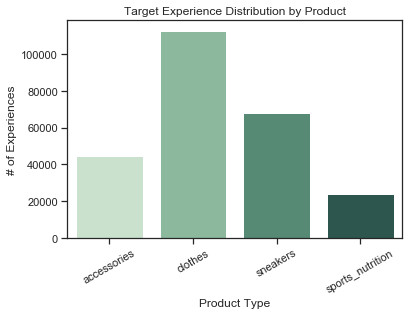

In [128]:
sns.set_style("ticks")
fig = plt.figure()
ax = sns.barplot(x = 'product', y = 'user_id', data = tar_products, palette="ch:2.5,-.2,dark=.3")
ax.set(xlabel = 'Product Type', ylabel = '# of Experiences')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('Target Experience Distribution by Product')
plt.show()

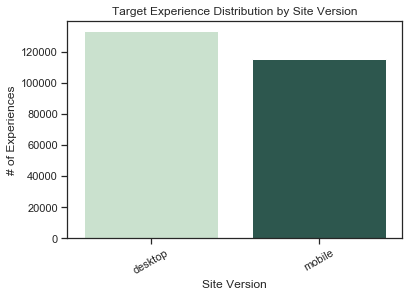

In [129]:
fig = plt.figure()
ax = sns.barplot(x = 'site_version', y = 'user_id', data = tar_site_version, palette="ch:2.5,-.2,dark=.3")
ax.set(xlabel = 'Site Version', ylabel = '# of Experiences')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('Target Experience Distribution by Site Version')
plt.show()

In [131]:
tar_banner

,title,user_id
0,order,248722


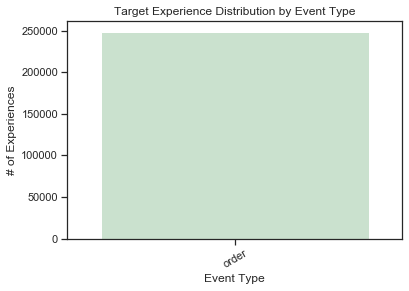

In [130]:
fig = plt.figure()
ax = sns.barplot(x = 'title', y = 'user_id', data = tar_banner, palette='ch:2.5,-.2,dark=.3')
ax.set(xlabel = 'Event Type', ylabel = '# of Experiences')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('Target Experience Distribution by Event Type')
plt.show()

## Check duplicates 

In [6]:
df['order_id'].nunique()

8471220

In [7]:
df['user_id'].nunique()

4254619

In [18]:
df['page_id'].nunique()

7393316

In [58]:
df['product'].value_counts()

clothes             1786438
company             1725056
sneakers            1703342
sports_nutrition    1634625
accessories         1621759
Name: product, dtype: int64

## Plot reorder distribution  

In [63]:
#plt.figure()
repurchases = df.groupby('user_id')['order_id'].count().sort_values(ascending = False)
#repurchases.plot.hist(bins = 30, alpha =.5)
#plt.figtext()
#plt.xlim(0,15)
repurchases.head(5)

user_id
6e1d9fca53a19d4f105947348fd1d627    23
aa33d045826d234eb5858674dbfe93f2    22
27af71559f2723868c078c49bd3ca0db    22
b89dfb3b9656f8836849bcb874afac70    22
2b9a39dddd5b7a18891dfd0d3aa3c599    22
Name: order_id, dtype: int64

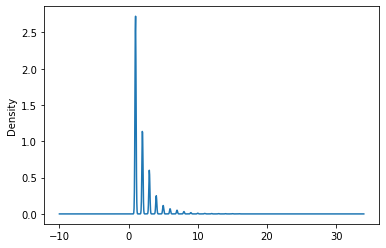

In [16]:
 repurchases.plot.kde()

In [64]:
repurchases_df = pd.DataFrame(repurchases)
#repurchases_df['order_id'].plot.hist()
repurchases_df.head(5)

,order_id
user_id,
6e1d9fca53a19d4f105947348fd1d627,23
aa33d045826d234eb5858674dbfe93f2,22
27af71559f2723868c078c49bd3ca0db,22
b89dfb3b9656f8836849bcb874afac70,22
2b9a39dddd5b7a18891dfd0d3aa3c599,22


In [106]:
repurchases_df.shape

(4254619, 1)

In [110]:
repurchases_df[repurchases_df['order_id']<=5].shape[0]/repurchases_df.shape[0]

0.9588007762857261

Text(0, 0.5, 'Number of Users')

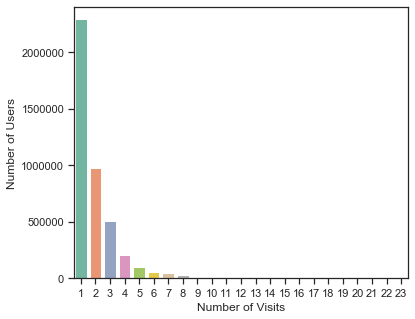

In [144]:
#repurchase_dist = repurchases_df['order_id'].value_counts()
plt.figure(figsize=(6,5))
repurchases_df
ax=sns.countplot(data=repurchases_df, x = 'order_id',palette='Set2')
plt.xlabel("Number of Visits")
plt.ylabel("Number of Users")

## Check null values 

In [51]:
df['order_id'].isnull().sum()

0

In [52]:
df['order_id'].isnull().sum()

0

In [50]:
df['product'].isnull().sum()

0

In [53]:
df['site_version'].isnull().sum()

0

In [57]:
sum(df['site_version'].isnull())

0

## Convert time to datetime 

In [6]:
df['date']= pd.to_datetime(df['time']).dt.date
df['time'] = pd.to_datetime(df['time']).dt.time

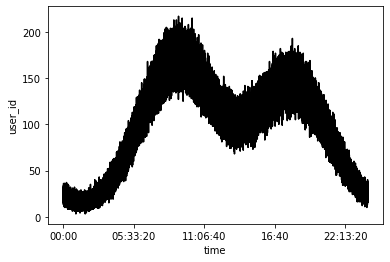

In [68]:
time_distribution = df.groupby('time')[['user_id']].count().reset_index()
sns.lineplot(x = 'time', y = 'user_id', data = time_distribution,color='black')

In [7]:
def ampm(time):
    if time.hour <12:
        return 'am'
    else:
        return 'pm'

In [8]:
df['ampm'] = df['time'].apply(ampm)

Text(0, 0.5, 'Number of Users')

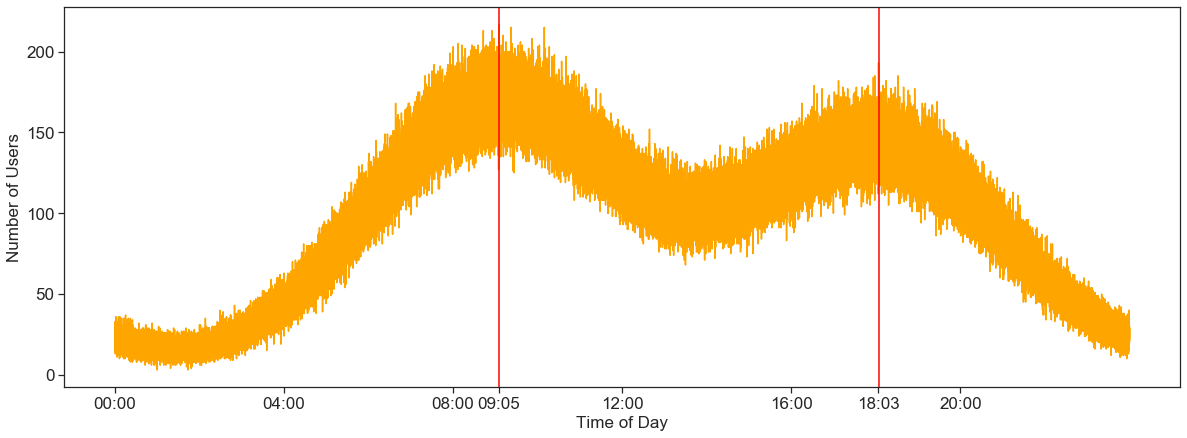

In [142]:
fig, ax = plt.subplots(figsize=(20, 7))
time_distribution = df.groupby('time')[['user_id']].count().reset_index()
max_time = time_distribution[time_distribution['user_id']==max(time_distribution['user_id'])]['time'].iloc[0]
time_distribution2 = df[df['ampm']=='pm'].groupby('time')[['user_id']].count().reset_index()
max_time2 = time_distribution2[time_distribution2['user_id']==max(time_distribution2['user_id'])]['time'].iloc[0]

ax = sns.lineplot(x = 'time', y = 'user_id', data = time_distribution,color='orange')
max_tick = time(max_time.hour,max_time.minute,0)
max_tick2 = time(max_time2.hour,max_time2.minute,0)

x_ticks = [time(0,0,0),time(4,0,0), time(8,0,0), time(12,0,0), time(16,0,0), time(20,0,0), max_tick, max_tick2]
ax.set_xticks(x_ticks)
ax.tick_params(labelsize=17)
plt.axvline(x=max_time, color='red')
plt.axvline(x=max_time2, color='red')
plt.xlabel('Time of Day', size=17)
plt.ylabel('Number of Users', size=17)

In [71]:
df[:3]

,order_id,user_id,page_id,product,site_version,time,title,target,date,ampm
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,09:24:43,banner_click,0,2019-01-11,am
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,09:38:51,banner_show,0,2019-01-09,am
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,09:12:45,banner_show,0,2019-01-09,am


In [9]:
def month(date):
    return date.month

def year(date):
    return date.year

In [10]:
df['month'] = df['date'].apply(month)
df['year'] = df['date'].apply(year)

In [59]:
gb_products = df.groupby('product')[['user_id']].count().reset_index()
gb_site_version = df.groupby('site_version')[['user_id']].count().reset_index()
gb_banner = df.groupby('title')[['user_id']].count().reset_index()

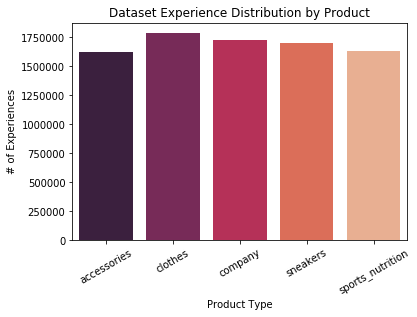

In [60]:
fig = plt.figure()
ax = sns.barplot(x = 'product', y = 'user_id', data = gb_products, palette='rocket')
ax.set(xlabel = 'Product Type', ylabel = '# of Experiences')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('Dataset Experience Distribution by Product')
plt.show()

In [117]:
gb_site_version

,site_version,user_id
0,desktop,2382885
1,mobile,6088335


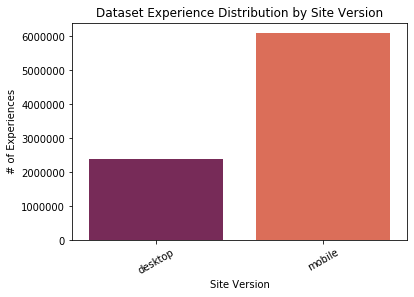

In [65]:
fig = plt.figure()
ax = sns.barplot(x = 'site_version', y = 'user_id', data = gb_site_version, palette='rocket')
ax.set(xlabel = 'Site Version', ylabel = '# of Experiences')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('Dataset Experience Distribution by Site Version')
plt.show()

In [126]:
gb_banner['user_id'].sum()
print(gb_banner['user_id'].iloc[0]/gb_banner['user_id'].sum()*100)
print(gb_banner['user_id'].iloc[1]/gb_banner['user_id'].sum()*100)
print(gb_banner['user_id'].iloc[2]/gb_banner['user_id'].sum()*100)
gb_banner

9.788247737634013
87.27566985628988
2.9360824060761024


,title,user_id
0,banner_click,829184
1,banner_show,7393314
2,order,248722


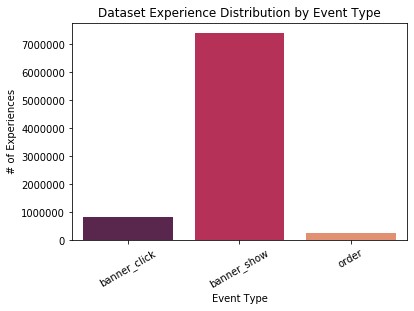

In [66]:
fig = plt.figure()
ax = sns.barplot(x = 'title', y = 'user_id', data = gb_banner, palette='rocket')
ax.set(xlabel = 'Event Type', ylabel = '# of Experiences')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('Dataset Experience Distribution by Event Type')
plt.show()

In [75]:
gb_time = df.groupby('date')[['user_id']].count().reset_index(level=0)

In [76]:
gb_time.head()

,date,user_id
0,2019-01-01,33131
1,2019-01-02,35626
2,2019-01-03,38202
3,2019-01-04,40614
4,2019-01-05,42751


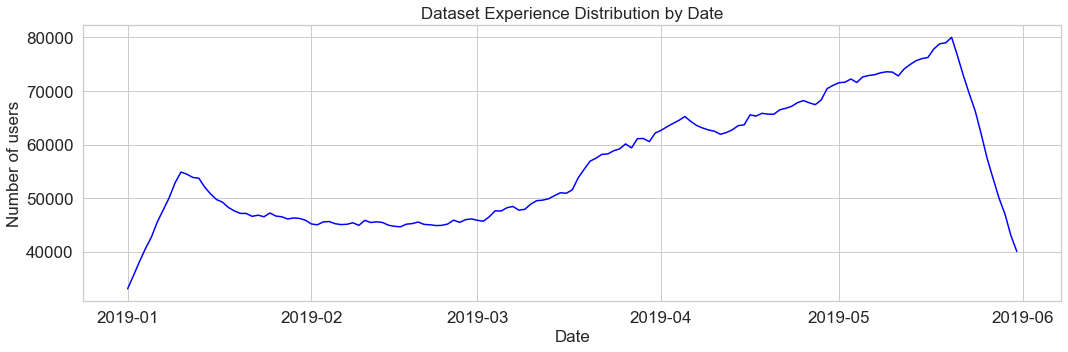

In [116]:
sns.set(style="whitegrid")

fig = plt.figure(figsize = (15,5))
ax = sns.lineplot(x="date", y="user_id",data=gb_time, color = 'blue')
ax.set_title('Dataset Experience Distribution by Date')
ax.tick_params(labelsize=17)
plt.xlabel('Date',size=17)
plt.ylabel('Number of users',size = 17)
plt.tight_layout()
plt.title('Dataset Experience Distribution by Date',size =17)
plt.show()

## Variable Independence

In [181]:
df = pd.read_csv('product.csv')
df['weekday'] = pd.to_datetime(df['time']).dt.dayofweek
df['date'] = pd.to_datetime(df['time']).dt.date
df['time'] = pd.to_datetime(df['time']).dt.time
df['month'] = df['date'].apply(month)

In [182]:
df.head(5)

,order_id,user_id,page_id,product,site_version,time,title,target,weekday,date,month
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,09:24:43,banner_click,0,4,2019-01-11,1
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,09:38:51,banner_show,0,2,2019-01-09,1
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,09:12:45,banner_show,0,2,2019-01-09,1
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,08:58:18,banner_show,0,3,2019-01-03,1
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,08:59:15,banner_click,0,3,2019-01-03,1


In [183]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import pandas as pd

# function: chi_square
# input: 
#   var1: name of variable 1 in interest, dtype=string
#   var2: name of variable 2 in interest, dtype=string
#   data: dataframe
#   prob: probability conf
# ouput: 

def chi_square(var1, var2, data):
    # contingency table
    table = pd.crosstab(data[var1], data[var2])
    stat, p, dof, expected = chi2_contingency(table)
    #print('dof=%d' % dof)
    prob = 0.95
    # interpret test-statistic
    critical = chi2.ppf(prob, dof)
#     print('critical=%.3f, chi-stat=%.3f, p-value=%.3f' % (critical, stat, p))
#     if abs(stat) >= critical:
#         print('Dependent (reject H0)')
#     else:
#         print('Independent (fail to reject H0)')
    return p

In [186]:
cols = ['product', 'site_version', 'title', 'date', 'weekday', 'month','target']
df_chisq = pd.DataFrame(columns=cols, index=cols)
for col in cols:
    for index in cols:
        df_chisq.loc[index, col] = chi_square(index, col, df)
df_chisq

,product,site_version,title,date,weekday,month,target
product,0,0,0,0,0.0308862,0,0
site_version,0,0,0,0,3.45947e-32,0,0
title,0,0,0,0,0.159131,0,0
date,0,0,0,0,0,0,0
weekday,0.0308862,3.45947e-32,0.159131,0,0,0,0.0265093
month,0,0,0,0,0,0,0
target,0,0,0,0,0.0265093,0,0


[Text(0.5, 0, 'product'),
 Text(1.5, 0, 'site_version'),
 Text(2.5, 0, 'title'),
 Text(3.5, 0, 'date'),
 Text(4.5, 0, 'weekday'),
 Text(5.5, 0, 'month'),
 Text(6.5, 0, 'target')]

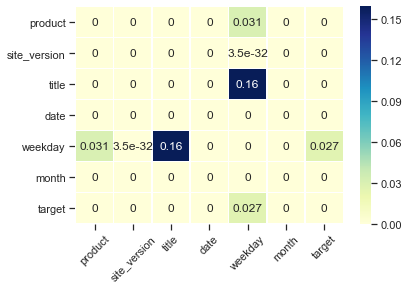

In [187]:
df_chisq = df_chisq.astype(float)
ax = sns.heatmap(df_chisq, linewidths=0.5, cmap="YlGnBu", annot=True)
ax.set_xticklabels(cols, rotation=45)

**Modeling** 
1. Random Forest 

In [191]:
def ampm(time):
    if time.hour <12:
        return 'am'
    else:
        return 'pm'

In [192]:
df['ampm'] = df['time'].apply(ampm)

In [193]:
df[:3]

,order_id,user_id,page_id,product,site_version,time,title,target,weekday,date,month,ampm
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,09:24:43,banner_click,0,4,2019-01-11,1,am
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,09:38:51,banner_show,0,2,2019-01-09,1,am
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,09:12:45,banner_show,0,2,2019-01-09,1,am


baseline accuracy 

In [194]:
df[df['target'] == 1].shape[0]/df.shape[0]

0.029360824060761025

In [195]:
var_list = df.columns.to_list()
var_list.remove('order_id')
var_list.remove('user_id')
var_list.remove('time')
var_list.remove('page_id')
var_list.remove('date')
var_list.remove('target')
var_list.remove('title')
var_list

['product', 'site_version', 'weekday', 'month', 'ampm']

In [147]:
#df_with_dummies = pd.get_dummies(df,columns=var_list,drop_first=True)

In [197]:
df_with_dummies = pd.get_dummies(df,columns=var_list)

In [198]:
df_with_dummies.head(3)

,order_id,user_id,page_id,time,title,target,date,product_accessories,product_clothes,product_company,product_sneakers,product_sports_nutrition,site_version_desktop,site_version_mobile,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_1,month_2,month_3,month_4,month_5,ampm_am,ampm_pm
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,09:24:43,banner_click,0,2019-01-11,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,09:38:51,banner_show,0,2019-01-09,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,09:12:45,banner_show,0,2019-01-09,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [202]:
X = df_with_dummies.drop(columns=['target','order_id','user_id',
                                  'page_id','time','date','title'], axis=1)
y = df_with_dummies['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [203]:
X_train.head()
X_train.shape

(5929854, 21)

In [204]:
X_train.columns.values

array(['product_accessories', 'product_clothes', 'product_company',
       'product_sneakers', 'product_sports_nutrition',
       'site_version_desktop', 'site_version_mobile', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'ampm_am', 'ampm_pm'], dtype=object)

In [205]:
%%time 
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0,class_weight="balanced")
model.fit(X_train,y_train)
y_pred =model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.656841242072177
Wall time: 15min 17s


In [211]:
confusion_matrix(y_test, y_pred)

array([[1615157,  851706],
       [  20386,   54117]], dtype=int64)

**Modeling** 
2. Logistic Regression 

In [207]:
var_list

['product', 'site_version', 'weekday', 'month', 'ampm']

In [213]:
df_with_dummies_drop_first = pd.get_dummies(df,columns=var_list,drop_first=True)

In [214]:
X = df_with_dummies_drop_first.drop(columns=['target','order_id','user_id',
                                  'page_id','time','date','title'], axis=1)
y = df_with_dummies_drop_first['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [215]:
X_train.shape

(5929854, 16)

In [217]:
%%time 
model1 =  LogisticRegression(random_state=0, class_weight='balanced')
model1.fit(X_train,y_train)
y_pred1 =model1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

C:\Users\catym\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.66212422767913
Wall time: 34 s


In [218]:
confusion_matrix(y_test, y_pred1)

array([[1628996,  837867],
       [  20799,   53704]], dtype=int64)

**AB TESTING**

Problem Statement: Does showing customers product specific banners result in a higher conversion rate than a generic company banner?

In [12]:
df[:3]

,order_id,user_id,page_id,product,site_version,time,title,target,date,ampm,month,year
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,09:24:43,banner_click,0,2019-01-11,am,1,2019
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,09:38:51,banner_show,0,2019-01-09,am,1,2019
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,09:12:45,banner_show,0,2019-01-09,am,1,2019


In [49]:
abtest = df.groupby(['product','title'])[['user_id']].count().reset_index()


abtest

,product,title,user_id
0,accessories,banner_click,136254
1,accessories,banner_show,1440954
2,accessories,order,44551
3,clothes,banner_click,220595
4,clothes,banner_show,1453128
5,clothes,order,112715
6,company,banner_click,144821
7,company,banner_show,1580235
8,sneakers,banner_click,182596
9,sneakers,banner_show,1453027


In [52]:
control_num = (abtest['product']=='company') & (abtest['title']=='order')
control_denom = abtest['product'] == 'company'

In [65]:
baseline_rate = abtest[control_num]['user_id'].sum()/abtest[control_denom]['user_id'].sum()
significance = 0.01
confidence_level = 0.05
sensitivity = 0.8

import statsmodels.api as sms
effect_size = sms.stats.proportion_effectsize(baseline_rate, baseline_rate + significance)
sample_size = sms.stats.NormalIndPower().solve_power(effect_size = effect_size, power = sensitivity, 
                                               alpha = confidence_level, ratio=1)

print("Required sample size: ", round(sample_size), " per group")


Required sample size:  391  per group


In [71]:
## Group 1: Accessores ##
g1_num = (abtest['product']=='accessories') & (abtest['title']=='order')
g1_denom = abtest['product'] == 'accessories'

prob_control_g1 = (abtest[control_num]['user_id'].sum() + abtest[g1_num]['user_id'].sum())/(abtest[control_denom]['user_id'].sum()+abtest[g1_denom]['user_id'].sum())


## Group 2: Clothes ##
g2_num = (abtest['product']=='clothes') & (abtest['title']=='order')
g2_denom = abtest['product']=='clothes'

prob_control_g2 = (abtest[control_num]['user_id'].sum() + abtest[g2_num]['user_id'].sum())/(abtest[control_denom]['user_id'].sum()+abtest[g2_denom]['user_id'].sum())

## Group 3: Sneakers ##
g3_num = (abtest['product']=='sneakers') & (abtest['title']=='order')
g3_denom = abtest['product']=='sneakers'

prob_control_g3 = (abtest[control_num]['user_id'].sum() + abtest[g3_num]['user_id'].sum())/(abtest[control_denom]['user_id'].sum()+abtest[g3_denom]['user_id'].sum())

## Group 4: Sports Nutrition ##
g4_num = (abtest['product']=='sports_nutrition') & (abtest['title']=='order')
g4_denom = abtest['product']=='sports_nutrition'

prob_control_g4 = (abtest[control_num]['user_id'].sum() + abtest[g4_num]['user_id'].sum())/(abtest[control_denom]['user_id'].sum()+abtest[g4_denom]['user_id'].sum())


print(prob_control_g1)
print(prob_control_g2)
print(prob_control_g3)
print(prob_control_g4)

0.013311461792779105
0.03209887301530346
0.019752374140925295
0.007065254111923126


In [76]:
total_users_control = abtest[control_denom]['user_id'].sum()
conversion_control = abtest[control_num]['user_id'].sum()

total_users_treatment_g1 = abtest[g1_denom]['user_id'].sum()
conversion_treatment_g1 = abtest[g1_num]['user_id'].sum()

total_users_treatment_g2 = abtest[g2_denom]['user_id'].sum()
conversion_treatment_g2 = abtest[g2_num]['user_id'].sum()

total_users_treatment_g3 = abtest[g3_denom]['user_id'].sum()
conversion_treatment_g3 = abtest[g3_num]['user_id'].sum()

total_users_treatment_g4 = abtest[g4_denom]['user_id'].sum()
conversion_treatment_g4 = abtest[g4_num]['user_id'].sum()

In [81]:
#Calculate pooled standard error and margin of error for each comparison
import math
import scipy.stats as st

z_score = st.norm.ppf(1 - confidence_level / 2)

se_pooled_g1 = math.sqrt(prob_control_g1 * (1 - prob_control_g1) * (1 / total_users_control + 1 / total_users_treatment_g1))
margin_of_error_g1 = se_pooled_g1 * z_score

se_pooled_g2 = math.sqrt(prob_control_g2 * (1 - prob_control_g2) * (1 / total_users_control + 1 / total_users_treatment_g2))
margin_of_error_g2 = se_pooled_g2 * z_score

se_pooled_g3 = math.sqrt(prob_control_g3 * (1 - prob_control_g3) * (1 / total_users_control + 1 / total_users_treatment_g3))
margin_of_error_g3 = se_pooled_g3 * z_score

se_pooled_g4 = math.sqrt(prob_control_g4 * (1 - prob_control_g4) * (1 / total_users_control + 1 / total_users_treatment_g4))
margin_of_error_g4 = se_pooled_g4 * z_score



In [85]:
#Calculate dhat, the estimated difference between probability of conversions in the experiment and control groups

d_hat_g1 = (conversion_treatment_g1 / total_users_treatment_g1) - (conversion_control / total_users_control)
d_hat_g2 = (conversion_treatment_g2 / total_users_treatment_g2) - (conversion_control / total_users_control)
d_hat_g3 = (conversion_treatment_g3 / total_users_treatment_g3) - (conversion_control / total_users_control)
d_hat_g4 = (conversion_treatment_g4 / total_users_treatment_g4) - (conversion_control / total_users_control)


In [87]:
#Test if we can reject the null hypothesis

lower_bound_g1 = d_hat_g1 - margin_of_error_g1
upper_bound_g1 = d_hat_g1 + margin_of_error_g1

lower_bound_g2 = d_hat_g2 - margin_of_error_g2
upper_bound_g2 = d_hat_g2 + margin_of_error_g2

lower_bound_g3 = d_hat_g3 - margin_of_error_g3
upper_bound_g3 = d_hat_g3 + margin_of_error_g3

lower_bound_g4 = d_hat_g4 - margin_of_error_g4
upper_bound_g4 = d_hat_g4 + margin_of_error_g4

In [89]:
lb_list = [lower_bound_g1,lower_bound_g2,lower_bound_g3,lower_bound_g4]
ub_list = [upper_bound_g1,upper_bound_g2,upper_bound_g3,upper_bound_g4]

In [94]:
count = 0
for num in lb_list:
    count+=1
    if significance < num:
        print("Reject null hypothesis for group",count)
    else: 
        print("Do not reject the null hypothesis for group".count)

print()
print("The lower bound of the confidence interval for group 1 is ", round(lower_bound_g1 * 100, 2), "%")
print("The upper bound of the confidence interval for group 1 is ", round(upper_bound_g1 * 100, 2), "%")
print()
print("The lower bound of the confidence interval for group 2 is ", round(lower_bound_g2 * 100, 2), "%")
print("The upper bound of the confidence interval for group 2 is ", round(upper_bound_g2 * 100, 2), "%")
print()
print("The lower bound of the confidence interval for group 3 is ", round(lower_bound_g3 * 100, 2), "%")
print("The upper bound of the confidence interval for group 3 is ", round(upper_bound_g3 * 100, 2), "%")
print()
print("The lower bound of the confidence interval for group 4 is ", round(lower_bound_g4 * 100, 2), "%")
print("The upper bound of the confidence interval for group 4 is ", round(upper_bound_g4 * 100, 2), "%")

Reject null hypothesis for group 1
Reject null hypothesis for group 2
Reject null hypothesis for group 3
Reject null hypothesis for group 4

The lower bound of the confidence interval for group 1 is  2.72 %
The upper bound of the confidence interval for group 1 is  2.77 %

The lower bound of the confidence interval for group 2 is  6.27 %
The upper bound of the confidence interval for group 2 is  6.35 %

The lower bound of the confidence interval for group 3 is  3.95 %
The upper bound of the confidence interval for group 3 is  4.01 %

The lower bound of the confidence interval for group 4 is  1.43 %
The upper bound of the confidence interval for group 4 is  1.47 %


Since we can reject each null hypothesis, we can conclude that showing a product specific banner results in a higher conversion rate versus the company generic one.